This file finds and graphs the frequencies of target words over time.

Author: Amy Weng 

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

directory = r'C:\Users\amycw\Desktop\ecbc research'
folder = directory+"\\"+'eebo_clean'
eicfile = directory + "\\" + 'eic_dated.csv'
monopolyfile = directory + "\\" + 'monopoly_dated.csv'

In [1]:
author = {} 
def authors(filename, start, end):
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            a = data.iloc[0].author
            if a not in author.keys(): 
                author[a] = 0
            author[a] += 1
    for k,v in sorted (author.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(k + ": " + str(v) + " ")

In [ ]:
authors(eicfile,1660,1714)

In [4]:
authors(eicfile,1695,1696)

no author: 12 
england and wales parliament: 5 
company of scotland trading to africa and the indies: 2 
briscoe john fl : 2 
william king of england -: 1 
whiston james -: 1 
verax philanax: 1 
tindall william: 1 
season nicolas -: 1 
scotland: 1 
miller william: 1 
j s: 1 
houghton thomas gent europe's glory: 1 
england and wales sovereign - william : 1 


In [ ]:
authors(monopolyfile,1660,1714)

In [6]:
def titles(filename, start, end):
    titles = {} 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            t = data.iloc[0].title
            if t not in titles.keys(): 
                titles[t] = 0
            titles[t] += 1
    for pair in sorted (titles.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)
        print("\n")

In [7]:
titles(eicfile, 1695,1696)

('the humble address of the right honourable the lords spiritual temporal and commons in parliament assembled presented to his majesty on the seventeenth of december ', 2)


('reasons humbly offered to the consideration of the lords spiritual and temporal on behalf of the bill to restrain the wearing of east-india and persia wrought silks ', 2)


('discourse of money ', 2)


('considerations requiring greater care for trade in england and some expedients proposed', 2)


('by the king a proclamation for apprehending and securing the person of monsieur john robert william r whereas we have been informed that by the examinations and informations upon oath of several persons lately taken before a committee of both our houses of parliament ', 2)


('an account of the men of war not including privateers taken from the french since the beginning of the war declared the th of may to the st of october ', 2)


('a full and exact collection of all the considerable addresses memorials petitions an

In [ ]:
def scatter(dates,freqs,title,color):
    xData = list(map(int, dates))
    yData = list(map(int, freqs))
    xyCoords=np.c_[xData,yData]
    uniquePoints, counts = np.unique(xyCoords, return_counts=True,axis=0)
    plt.scatter(uniquePoints[:,0],uniquePoints[:,1],s=counts*10,c=color,)

    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

In [ ]:
def scatter3D(dates, yFreq, zFreq, title, ylabel, zlabel,color):
    x = list(map(int, dates))
    y = list(map(int, yFreq))
    z = list(map(int, zFreq))

    plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(x, y, z, color = color)
    plt.title(title)
    ax.set_xlabel("Year", fontweight ='bold')
    ax.set_ylabel(ylabel, fontweight ='bold')
    ax.set_zlabel(zlabel, fontweight ='bold')
    plt.show()

In [8]:
def bar(xData,yData,title,xlabel,ylabel):
    if (xData == "Year"):
        xData = list(map(int, xData))
        yData = list(map(int, yData))
    plt.bar(xData,yData)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [9]:
dates = []
freqs = []
freqDates = {}  
def freqOverTime(filename, word, start, end):
    count = 0 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            text = data.iloc[0].text
            if (re.search(word,text)!=None): 
                count += 1
                dates.append(date)
                freqs.append(len(re.findall(lexicon,text)))
                if date not in freqDates.keys(): 
                    freqDates[date] = 0
                freqDates[date] += 1
    print("The total number of texts is "+str(count))
    for pair in sorted (freqDates.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)

In [ ]:
years = {} 
def findYears(filename,start,end):
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            if date not in years.keys(): 
                years[date] = 0
            years[date] += 1
    for pair in sorted (years.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)


In [ ]:
findYears(eicfile,1660,1714)

In [11]:
eic = re.compile("east india company|east-india company|east-india-company")
monopoly = re.compile('monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist|monopolizer|monopolize|monopolizes|monopolye|monopolyes')
lexicon = re.compile('pirate|pirates|piracy')

medical = re.compile("corruption|consumption|body politick|corrupt|consume|wasting|waste|blood|physician|decay|body|canker|cancer|disease|illness|remedy|cure|sickness|hepatitis|fever|spirit|brain|mind|vital|therapeutic|degeneration|degenerate|plague|smells|putrid|bad|tetrid|breathing|wholesome|healthy|unhealthy|sane|insane|nervous|languish|faculties|enfeeblement|drinks|tuberculosis|constitution|bile|black bile|yellow bile|phlegm|lung|sores|fog|smoke|diagnosis|prognosis|fiber|atrophy|morbid|mortal|mortality|nerves|inanition|defect|distemper|swelling|upset|stomach|cough|exercise|unwholesome|evacuation|fatal|fatality|vessels|hemmorrhage|bleeding|bleed|melancholy|diabetes|asthma|vomit|opiate|opium|ulcer|envy|jealousy|spoil|liver|vein|supple|heart|mouth|cured|pox")
economic = re.compile("economy|economic|oikonomike|household|price|prices|value|trade|traffic|traffique|money|bullion|exchange|luxury|spending|scarcity|plenty|east indies|corporation|west indies|carribean|india|corporation|company|merchant|merchants|plentitude|currency|calculation|public measure|consumables|superfluous|over-ballancing|over-balancing|impoverishing|gain|commerce|gold|silver|copper|ships|ship|debt|credit|debtor|creditor|decoctor|bank|usury|interest|rates|sugar|tobacco|beer|wool|uncharitable|charity|broker|monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist| monopolizer|monopolize|monopolizes|monopolye|monopolyes|importation|exportation|silk|coin|unnecessary|necessary|efficient|under-valuation|employment|immodest|immoderate|prodigality|austerity|excess|excessive|vital|artificial|goods|natural|cheap|expensive|victual|treasure|commodities|international|income|commodity|revenue|land|profitable|unprofitable|industry|work|ware|loss|transportation|balance|usurer|estate|corruptible|property|prosperity|substance|disturber|consumer|cloth|drapery|use|non-use|profusion|tea|spices|china|free trade|means|flourish")
political = re.compile("commonwealth|politick|politic|political|body politick|body politic|government|prince|war|ruler|king|queen|extortion|oppression|restoration|revolution|constitution|navy|military|army|strength|power|might|england|britain|ireland|netherlands|scotland|netherlands|dutch|spanish|germany|holy roman empire|mughal|christian|christianity|god|state|country|parliament|crisis|common|lords|lord|crisis|national|governor|public|publicke|low countries|controversy|controversies|authority|empire|bills|treatise|treatises|civilian|protection|pirates|pirate|civil war|massacre|indonesia|india|china|argier|tunis|kingdom|provincial|scandalous|scandal|majesty|subject|christiandom|enemy|turkish|ally")

# meed | mede | corrupt | corruption | bribe | bribery | presents | gifts | gifting | graft | gratuity | rewards | benefits | poison | extortion | favor | favour | gentle rewards | good turns | putrid | decay | dissolution | contamination | depravity | wickedness | corruptionem | corruptio | spoiling | seducing | destroy | seduce | perversion | vitiation | vitiare | impairment | vitium | vice | perverto | nabobs | nabob

In [12]:
freqOverTime(eicfile,lexicon,1660,1714)

The total number of texts is 99
(1696, 11)
(1695, 11)
(1698, 7)
(1672, 6)
(1660, 5)
(1700, 4)
(1688, 4)
(1682, 4)
(1676, 4)
(1666, 4)
(1663, 4)
(1697, 3)
(1693, 3)
(1691, 3)
(1689, 3)
(1685, 3)
(1681, 3)
(1699, 2)
(1680, 2)
(1675, 2)
(1664, 2)
(1694, 1)
(1690, 1)
(1687, 1)
(1684, 1)
(1673, 1)
(1670, 1)
(1669, 1)
(1668, 1)
(1665, 1)


In [ ]:
scatter(dates,freqs,"Pirate and Piracy in EIC texts 1660-1714","purple")

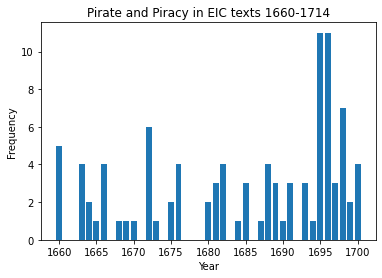

In [13]:
bar(freqDates.keys(),freqDates.values(),"Pirate and Piracy in EIC texts 1660-1714","Year","Frequency")

In [ ]:
bar(years.keys(),years.values(),"Number of EIC Texts, 1660-1714","Year","Num Books")